# 0. ggpubr

모든 내용은 [공식문서](http://www.sthda.com/english/rpkgs/ggpubr)에서 간추린 것입니다. 자세한것은 공식문서를 읽어주세요.

![](http://www.sthda.com/english/sthda-upload/images/ggpubr/ggpubr.png)

`ggpubr`은 ggplot2에 기반한 R 패키지입니다. 연구자들이 쉽게 높은 질의 도표를 그리는 것을 목표로 하고 있는 시각화 패키지죠. 주요 특징은 다음과 같습니다:

- `ggplot2` 패키지를 기반으로해서 좀 더 명확한 문법으로 보다 쉽게 사용할 수 있습니다.
- R 언어를 잘 모르더라도 높은 질의 도표를 만들수 있습니다.
- 자동으로 p-values 나 통계적 유의성을 표시할 할 수 있습니다. 
- 여러 도표를 한 페이지에 배열 할 수 있는 기능을 가지고 있습니다.
- 레이블이나 색상을 쉽게 변경할 수 있습니다.

먼저 `ggpubr` 로 시각화를 하는 간단한 방법을 살펴보고, 이후에 다양한 예시 도표를 보여드리겠습니다. 

# 1. ggpubr 설치하기:
**CRAN** 을 통한 설치법은 아래와 같습니다. 

```R
install.packages("ggpubr")
```

# 2. ggpubr 불러오기:

```R
library("ggpubr")
```

# 3. ggpubr로 도표 그리기

간단한 예시를 들어 시각화 방법을 살펴보겠습니다.
1. 대이터 불러와서 전처리하기
2. 시각화하고 설정하기

## 3.1. 데이터 불러오기

In [2]:
# 필요한  패키지 불러오기
library("dplyr") 
library("ggpubr")
options(warn=-1) # 경고메세지 무시하기

data("ToothGrowth") # 예제 데이터 불러오기
head(ToothGrowth,4) # 데이터 테이블 확인

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5


## 3.2. 시각화 설정하기

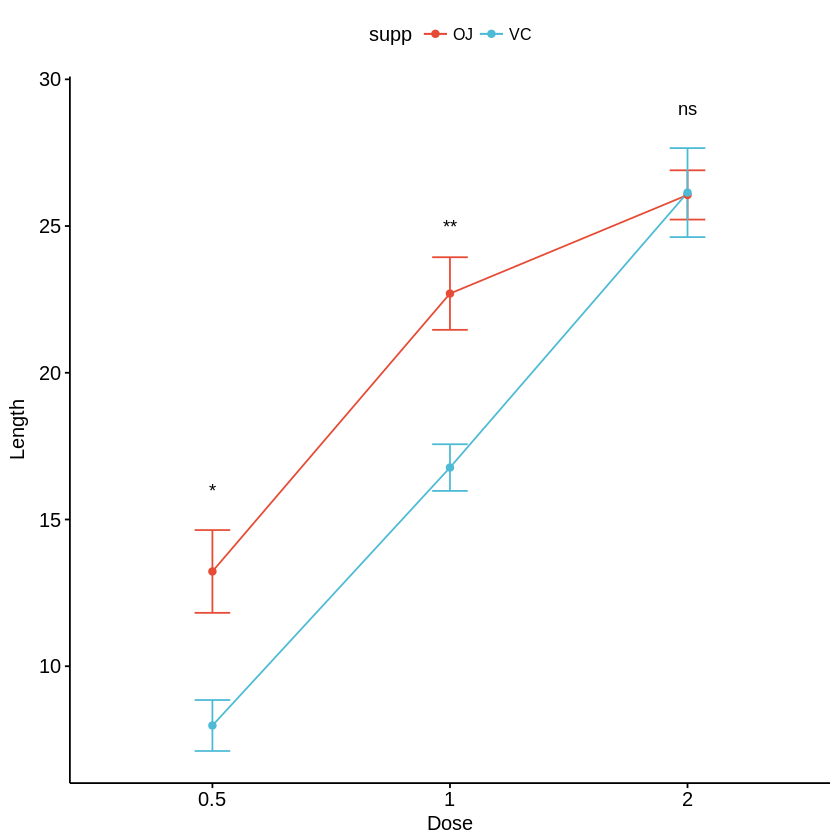

In [3]:
ggline(ToothGrowth, x = "dose", y = "len", add = "mean_se", # 각각의 축설정 
      color = "supp", palette = "npg")+  # 색상 설정하기
      stat_compare_means(aes(group = supp), label = "p.signif", label.y = c(16, 25, 29)) + # 통계적 유의성 표시
      labs(list(x = 'Dose', y = 'Length', fill = 'Supp')) # 레이블 변경

## 3.3. 한페이지에 여러 도표 넣기

여러 도표를 한페이지에 넣는 기능은 `ggarrange()`입니다. `cowplot`의 ` plot_grid()`함수에 기반하고 있죠. 그래서 사용법도 동일합니다.  아래의 예시 코드를 확인하세요.

```R
ggarrange(a, b, c ,  
          labels = c("A", "B", "C"),
          ncol = 2, nrow = 2)
```


# 4. 다양한 ggpubr 예시  

아래에는 많이 사용되는 도표의 예시를 제공하고 있습니다. 필요한 것이 있는지 살펴보세요.

## 4.1. 분포(Distribution) 시각화

In [4]:
# 예제 데이터 만들기
set.seed(1234)
wdata = data.frame(
   sex = factor(rep(c("F", "M"), each=200)),
   weight = c(rnorm(200, 55), rnorm(200, 58)))
head(wdata, 4)

sex,weight
F,53.79293
F,55.27743
F,56.08444
F,52.65430


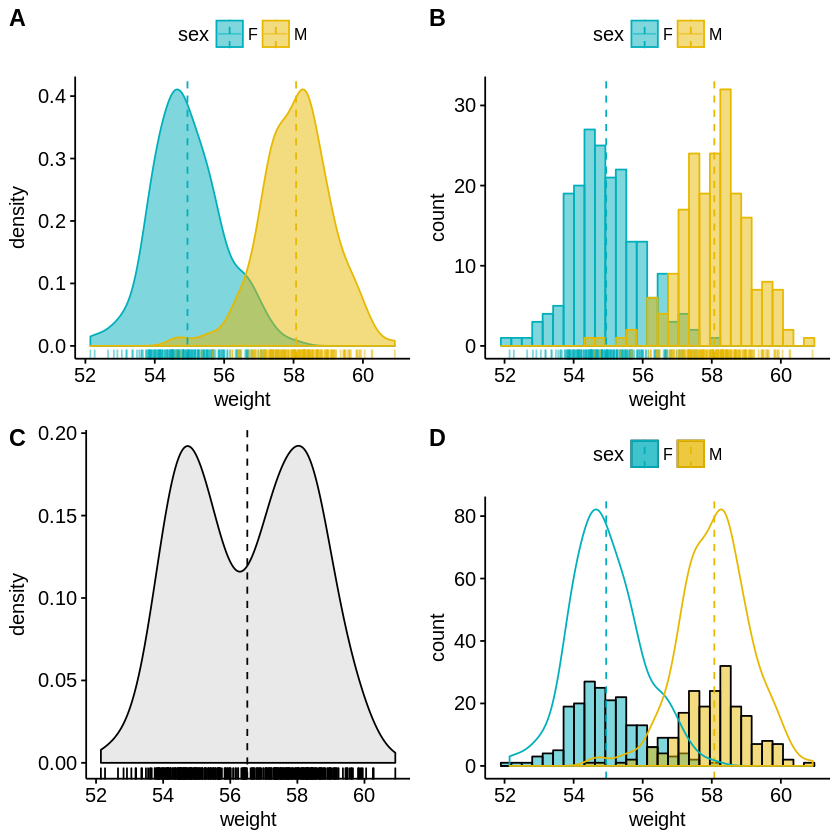

In [5]:
a1 <- ggdensity(wdata, x = "weight",
   add = "mean", rug = TRUE, # Density plot with mean lines and marginal rug
   color = "sex", fill = "sex",  # Change outline and fill colors by groups ("sex")
   palette = c("#00AFBB", "#E7B800")) # Use custom palette

a2 <- gghistogram(wdata, x = "weight",
   add = "mean", rug = TRUE,
   color = "sex", fill = "sex",
   palette = c("#00AFBB", "#E7B800"))

a3 <- ggdensity(wdata, x = "weight",
   add = "mean", rug = TRUE,
   fill = "lightgray")

# Combine histogram and density plots
a4 <-  gghistogram(wdata, x = "weight",
   add = "mean", rug = FALSE,
   fill = "sex", palette = c("#00AFBB", "#E7B800"),
   add_density = TRUE)

# 한페이지에 넣기
ggarrange(a1, a2, a3 , a4,
          labels = c("A", "B", "C", "D"),
          ncol = 2, nrow = 2)

# 4.2. 박스 그래프(Box plots), 바이올린(violin plots) 그래프

In [6]:
# Load data
data("ToothGrowth")
df <- ToothGrowth
head(df, 4)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5


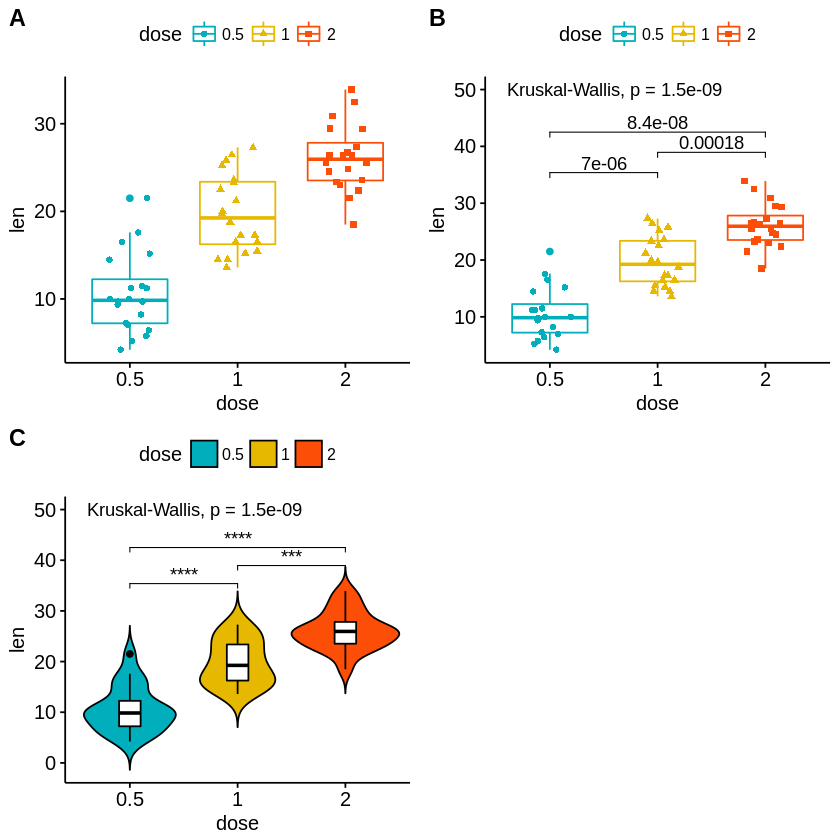

In [7]:
# Box plots with jittered points
p1 <- ggboxplot(df, x = "dose", y = "len",
        color = "dose", palette =c("#00AFBB", "#E7B800", "#FC4E07"),
        add = "jitter", shape = "dose")

# Add p-values comparing groups
my_comparisons <- list( c("0.5", "1"), c("1", "2"), c("0.5", "2") )
p2 <- p1 + stat_compare_means(comparisons = my_comparisons)+ # Add pairwise comparisons p-value
        stat_compare_means(label.y = 50)                   # Add global p-value

# Violin plots with box plots inside
p3 <- ggviolin(df, x = "dose", y = "len", fill = "dose",
         palette = c("#00AFBB", "#E7B800", "#FC4E07"),
         add = "boxplot", add.params = list(fill = "white"))+
         stat_compare_means(comparisons = my_comparisons, label = "p.signif")+ # Add significance levels
         stat_compare_means(label.y = 50)        # Add global the p-value 

ggarrange(p1, p2, p3,
          labels = c("A", "B", "C"),
          ncol = 2, nrow = 2)

## 4.3. 막대 그래프(Bar plots)
### 4.3.1 간단한 막대 그래프

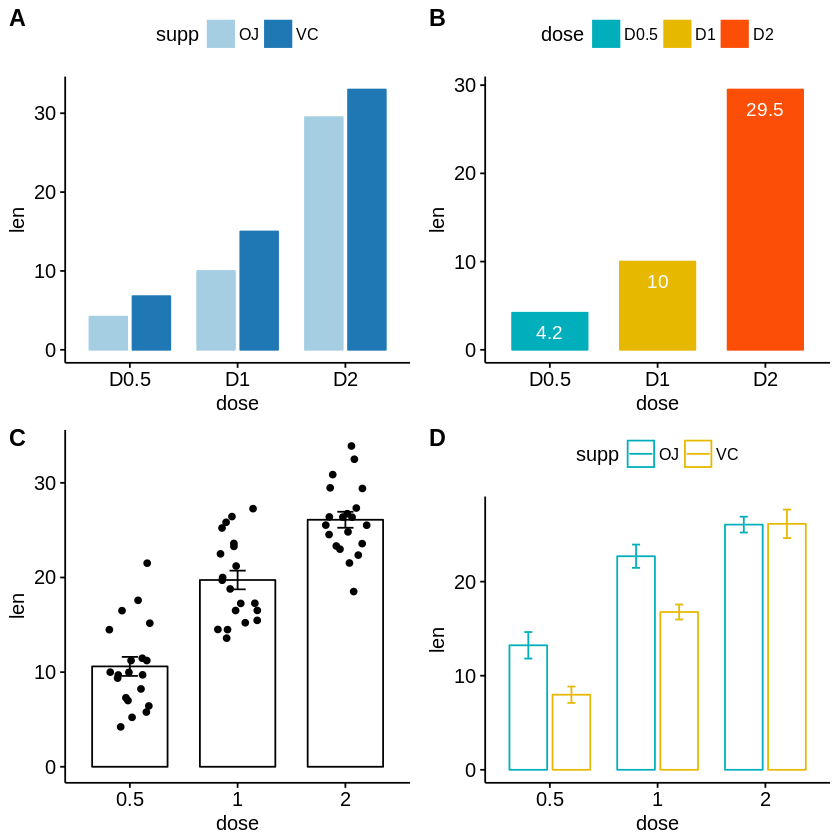

In [8]:
# example Data
df <- data.frame(dose=c("D0.5", "D1", "D2"),
   len=c(4.2, 10, 29.5))
df2 <- data.frame(supp=rep(c("VC", "OJ"), each=3),
   dose=rep(c("D0.5", "D1", "D2"),2),
   len=c(6.8, 15, 33, 4.2, 10, 29.5))
df3 <- ToothGrowth

# Change position: Interleaved (dodged) bar plot
p1 <- ggbarplot(df2, "dose", "len",
        fill = "supp", color = "supp", palette = "Paired",
        position = position_dodge(0.8))

# Change fill and outline color add labels inside bars
p2 <- ggbarplot(df, "dose", "len",
        fill = "dose", color = "dose",
        palette = c("#00AFBB", "#E7B800", "#FC4E07"),
        label = TRUE, lab.pos = "in", lab.col = "white")

# Add jitter points and errors (mean_se)
p3 <- ggbarplot(df3, x = "dose", y = "len",
        add = c("mean_se", "jitter"))

# Multiple groups with error bars and jitter point
p4 <- ggbarplot(df3, x = "dose", y = "len", color = "supp",
         add = "mean_se", palette = c("#00AFBB", "#E7B800"),
         position = position_dodge(0.8))

ggarrange(p1, p2, p3, p4,
          labels = c("A", "B", "C", "D"),
          ncol = 2, nrow = 2)

### 4.3.2 정돈된(Ordered) 바 그래프

**cyl**에 따라서 그룹화하고, 전체적으로 정렬한 그래프(A)와 그룹별로 정렬한 그래프(B)의 시각화입니다. 

In [9]:
# 샘플 데이터 불러오기
data("mtcars")
dfm <- mtcars
dfm$cyl <- as.factor(dfm$cyl) # Convert the cyl variable to a factor
dfm$name <- rownames(dfm) # Add the name colums
head(dfm[, c("name", "wt", "mpg", "cyl")]) # 데이터 살펴보기

,name,wt,mpg,cyl
Mazda RX4,Mazda RX4,2.620,21.0,6
Mazda RX4 Wag,Mazda RX4 Wag,2.875,21.0,6
Datsun 710,Datsun 710,2.320,22.8,4
Hornet 4 Drive,Hornet 4 Drive,3.215,21.4,6
Hornet Sportabout,Hornet Sportabout,3.440,18.7,8
Valiant,Valiant,3.460,18.1,6


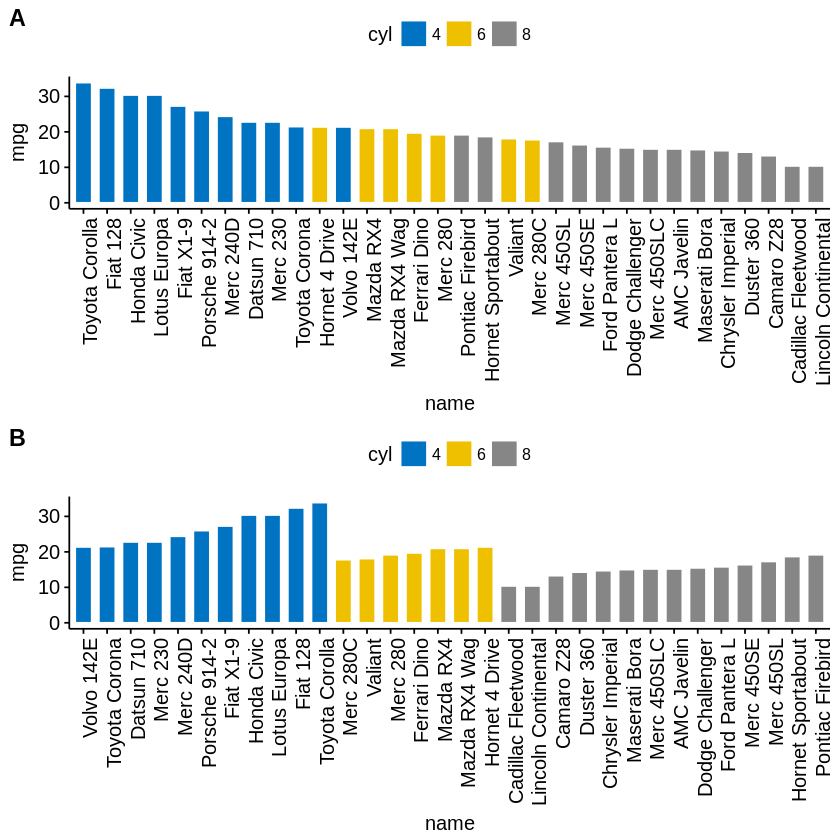

In [10]:
a1 <- ggbarplot(dfm, x = "name", y = "mpg",
          fill = "cyl",               # change fill color by cyl
          color = "white",            # Set bar border colors to white
          palette = "jco",            # jco journal color palett. see ?ggpar
          sort.val = "desc",          # Sort the value in dscending order
          sort.by.groups = FALSE,     # Don't sort inside each group
          x.text.angle = 90)           # Rotate vertically x axis texts

a2 <- ggbarplot(dfm, x = "name", y = "mpg",
          fill = "cyl",               # change fill color by cyl
          color = "white",            # Set bar border colors to white
          palette = "jco",            # jco journal color palett. see ?ggpar
          sort.val = "asc",           # Sort the value in dscending order
          sort.by.groups = TRUE,      # Sort inside each group
          x.text.angle = 90)           # Rotate vertically x axis texts

ggarrange(a1, a2,
          labels = c("A", "B"),
          ncol = 1, nrow = 2)

### 4.3.3. 편차(Deviation) 그래프

편차(deviation) 그래프는 각각의 값들이 평균값 대비 얼마나 차이가 나는지를 시각화 합니다. 여기서는 연비 평균값에 비교해서 각 차량의 편차가 얼마인지 계산해(Z-score) 도표를 그려보겠습니다. 

In [11]:
# Calculate the z-score of the mpg data
dfm$mpg_z <- (dfm$mpg -mean(dfm$mpg))/sd(dfm$mpg)
dfm$mpg_grp <- factor(ifelse(dfm$mpg_z < 0, "low", "high"), 
                     levels = c("low", "high"))
# Inspect the data
head(dfm[, c("name", "wt", "mpg", "mpg_z", "mpg_grp", "cyl")])

,name,wt,mpg,mpg_z,mpg_grp,cyl
Mazda RX4,Mazda RX4,2.620,21.0,0.1508848,high,6
Mazda RX4 Wag,Mazda RX4 Wag,2.875,21.0,0.1508848,high,6
Datsun 710,Datsun 710,2.320,22.8,0.4495434,high,4
Hornet 4 Drive,Hornet 4 Drive,3.215,21.4,0.2172534,high,6
Hornet Sportabout,Hornet Sportabout,3.440,18.7,-0.2307345,low,8
Valiant,Valiant,3.460,18.1,-0.3302874,low,6


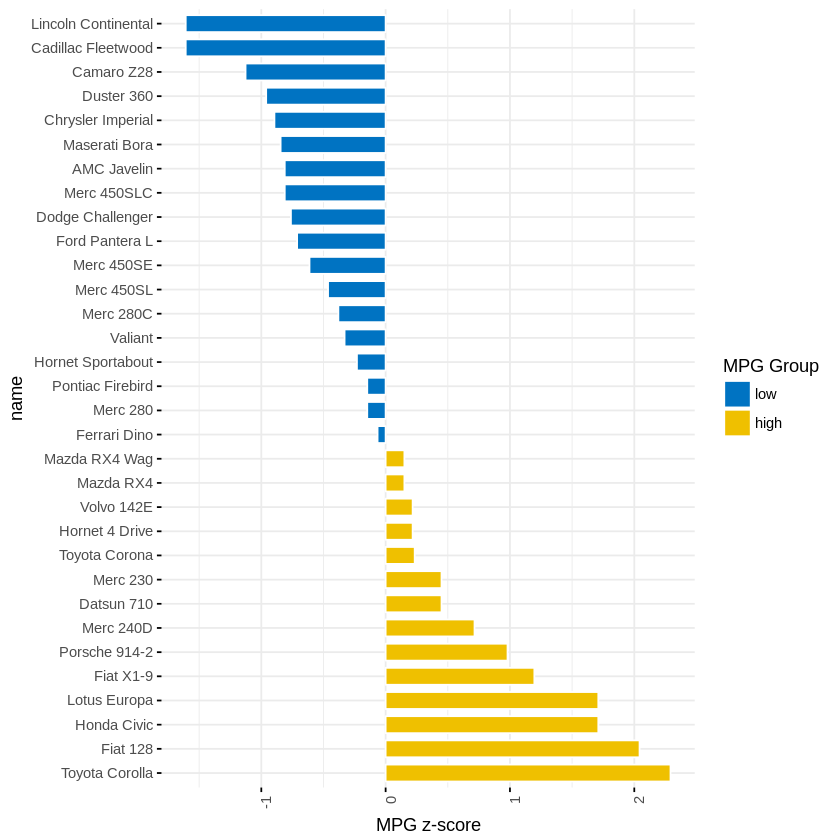

In [12]:
# Create an ordered bar plot, colored according to the level of mpg:
ggbarplot(dfm, x = "name", y = "mpg_z",
          fill = "mpg_grp",           # change fill color by mpg_level
          color = "white",            # Set bar border colors to white
          palette = "jco",            # jco journal color palett. see ?ggpar
          sort.val = "desc",          # Sort the value in descending order
          sort.by.groups = FALSE,     # Don't sort inside each group
          x.text.angle = 90,          # Rotate vertically x axis texts
          ylab = "MPG z-score",
          legend.title = "MPG Group",
          rotate = TRUE,
          ggtheme = theme_minimal())

# 4.4 점 그래프(Dot plot)
## 4.4.1 막대사탕(Lollipop) plot

막대사탕 그래프는 많은 양의 데이터를 시각화하는데 적합합니다. 아래 예시에서는 **cyl** 그룹에 맞춰서 색상을 구분하였습니다. 

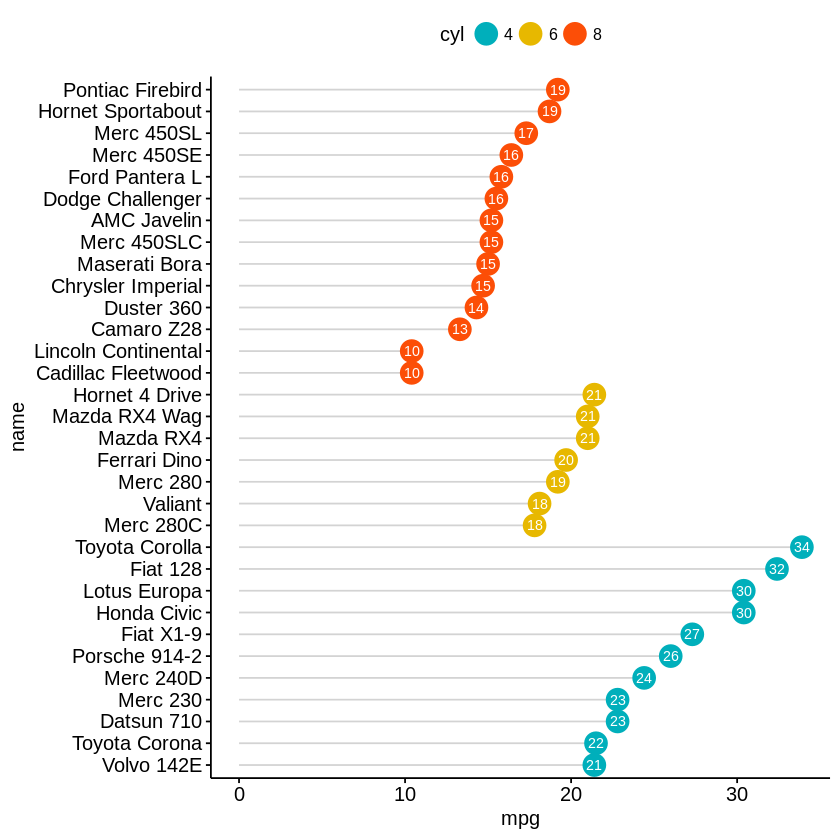

In [13]:
ggdotchart(dfm, x = "name", y = "mpg",
           color = "cyl",                                # Color by groups
           palette = c("#00AFBB", "#E7B800", "#FC4E07"), # Custom color palette
           sorting = "descending",                       # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           rotate = TRUE,                                # Rotate vertically
           group = "cyl",                                # Order by groups
           dot.size = 6,                                 # Large dot size
           label = round(dfm$mpg),                        # Add mpg values as dot labels
           font.label = list(color = "white", size = 9, 
           vjust = 0.5),               # Adjust label parameters
           ggtheme = theme_pubr())                        # ggplot2 theme

## 4.5. 도표에 설명(figure legend) 넣기

도표 밑에 설명을 넣는 방법입니다. 한줄단위로 내용을 끊어서 작성해야, 산출물에서 줄이 잘 맞게 할 수 있습니다. 
아래의 예시 코드를 확인하세요.
```r
ggparagraph(text, color = NULL, size = NULL, face = NULL, family = NULL,
  lineheight = NULL)
# S3 method for splitText
drawDetails(x, recording)
```

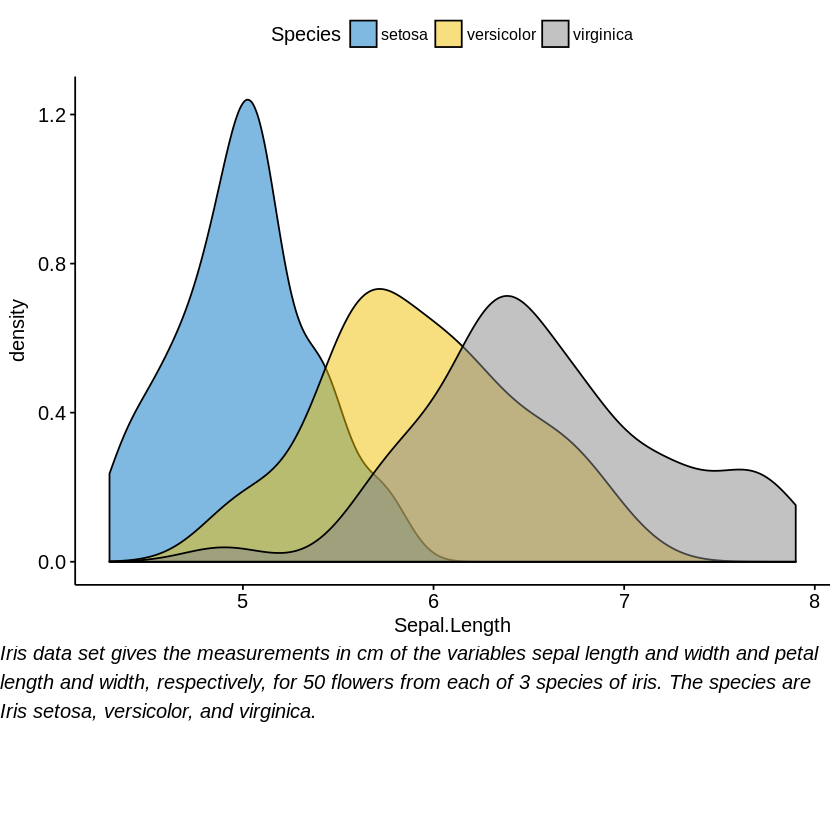

In [14]:
# Density plot
density.p <- ggdensity(iris, x = "Sepal.Length",
                      fill = "Species", palette = "jco")
# Text plot
text <- paste("Iris data set gives the measurements in cm",
             "of the variables sepal length and width",
             "and petal length and width, respectively,",
             "for 50 flowers from each of 3 species of iris.",
             "The species are Iris setosa, versicolor, and virginica.", sep = " ")
text.p <- ggparagraph(text, face = "italic", size = 12)

# Arrange the plots on the same page
ggarrange(density.p, text.p,
         ncol = 1, nrow = 2,
         heights = c(1, 0.3))

## 4.6. 선 그래프


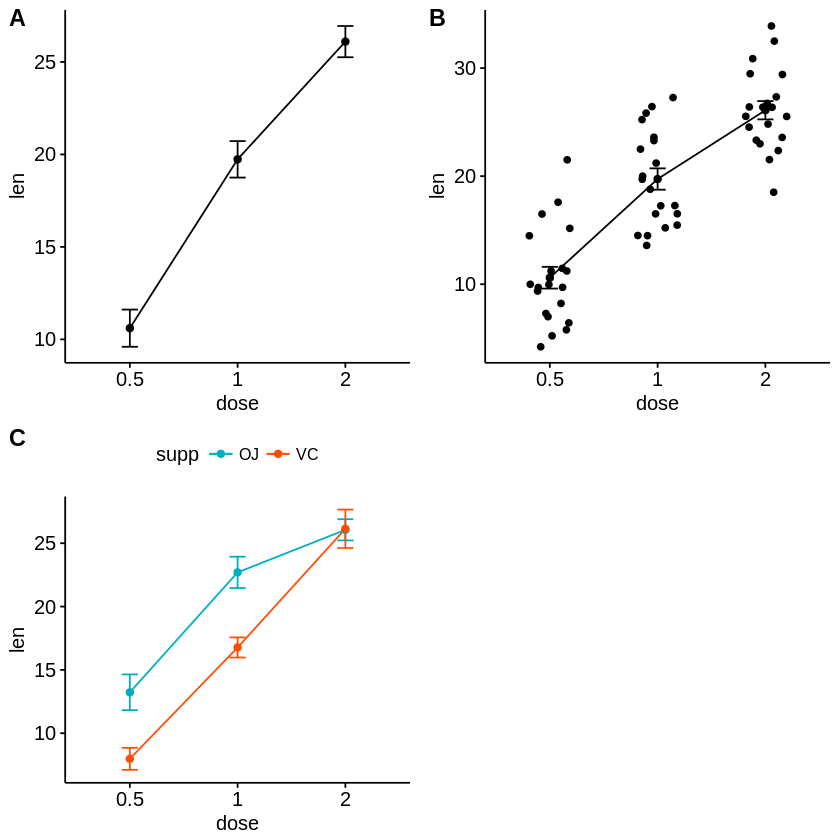

In [15]:
# Data: ToothGrowth data set we'll be used.
df3 <- ToothGrowth
# Add error bars: mean_se
# (other values include: mean_sd, mean_ci, median_iqr, ....)
# Add labels
p1 <- ggline(df3, x = "dose", y = "len", add = "mean_se")
# Add jitter points and errors (mean_se)
p2 <- ggline(df3, x = "dose", y = "len",
 add = c("mean_se",'jitter'))
# Multiple groups with error bars
p3 <- ggline(df3, x = "dose", y = "len", color = "supp",
 add = "mean_se", palette = c("#00AFBB", "#FC4E07"))

ggarrange(p1, p2, p3,
          labels = c("A", "B", "C"),
          ncol = 2, nrow = 2)

## 4.7. 히스토그램과 산포도(Scatter Plot with Histograms)

히스토그램과 산포도를 하나의 도표에 합쳐서 그려보도록 하겠습니다.

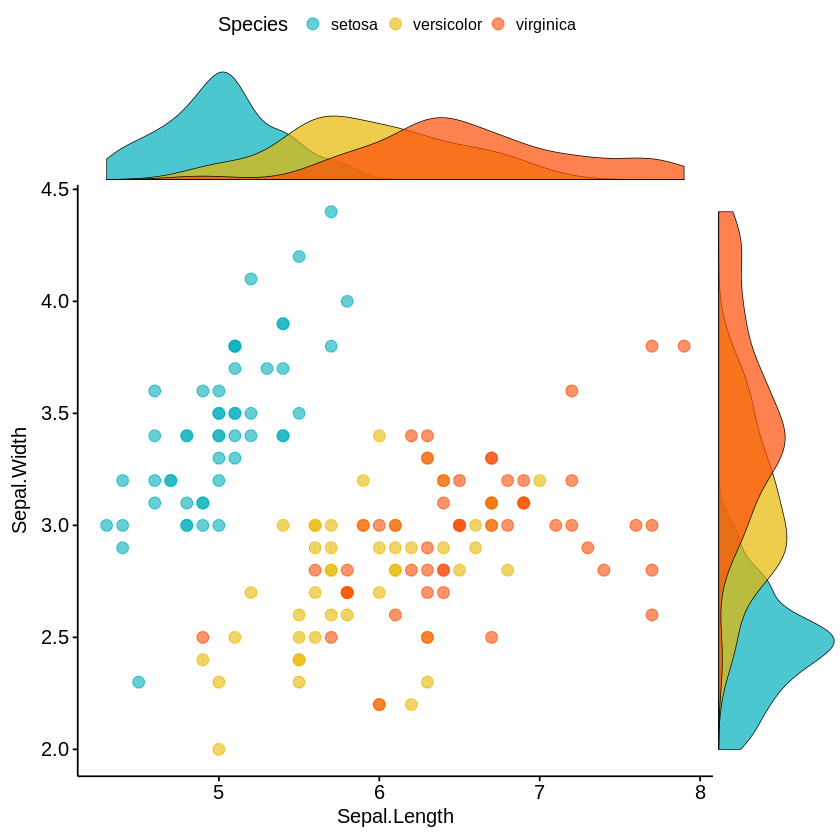

In [16]:
# Grouped data
ggscatterhist(
 iris, x = "Sepal.Length", y = "Sepal.Width",
 color = "Species", size = 3, alpha = 0.6,
 palette = c("#00AFBB", "#E7B800", "#FC4E07"),
 margin.params = list(fill = "Species", color = "black", size = 0.2))

## 4.8. 상관분석(Correlation Coefficients)과 P-values 추가하기

산포도에 **상관분석**과 **p-values**를 추가하는 방법입니다.

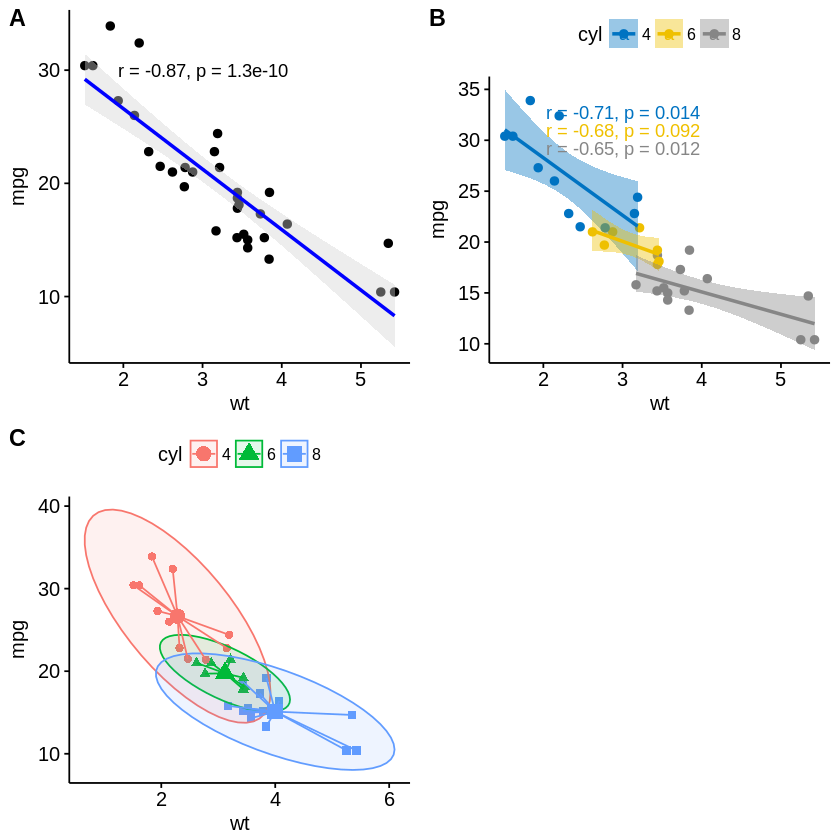

In [17]:
# Load data
data("mtcars")
df <- mtcars
df$cyl <- as.factor(df$cyl)

# Scatter plot with correlation coefficient
sp <- ggscatter(df, x = "wt", y = "mpg",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE) # Add confidence interval
# Add correlation coefficient
p1 <- sp + stat_cor(method = "pearson", label.x = 3, label.y = 30)
# Color by groups and facet
sp <- ggscatter(df, x = "wt", y = "mpg",
   color = "cyl", palette = "jco",
   add = "reg.line", conf.int = TRUE)
p2 <- sp + stat_cor(aes(color = cyl), label.x = 3)
# Scatter plot with ellipses and group mean points
p3 <- ggscatter(df, x = "wt", y = "mpg",
   color = "cyl", shape = "cyl",
   mean.point = TRUE, ellipse = TRUE)+
   stat_stars(aes(color = cyl))

ggarrange(p1, p2, p3,
          labels = c("A", "B", "C"),
          ncol = 2, nrow = 2)

## 4.9. Plot Paired Data

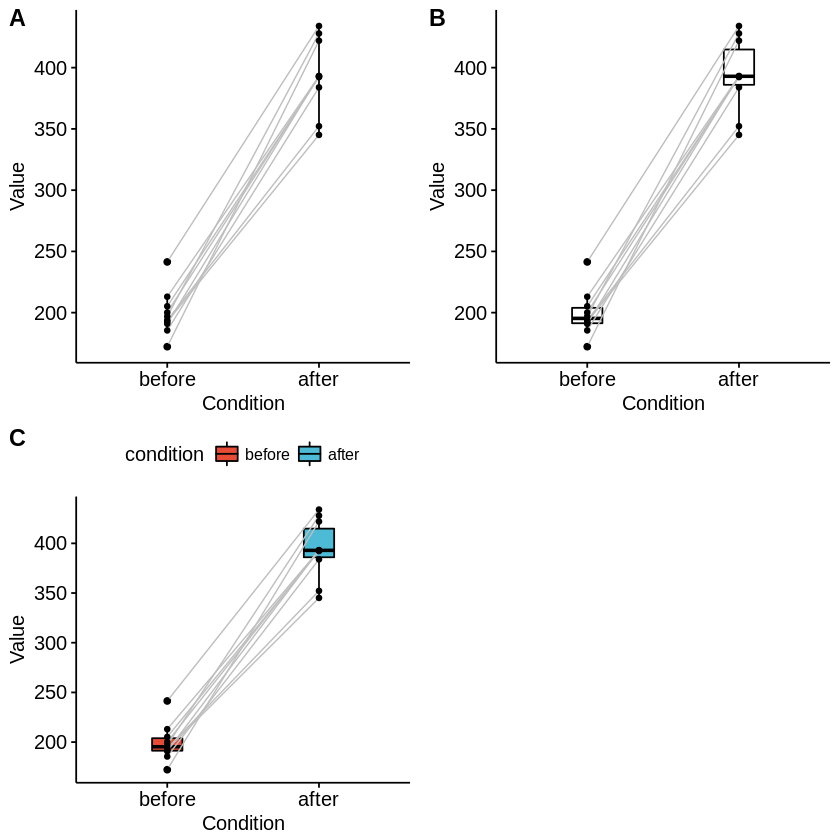

In [18]:
# Example data
before <-c(200.1, 190.9, 192.7, 213, 241.4, 196.9, 172.2, 185.5, 205.2, 193.7)
after <-c(392.9, 393.2, 345.1, 393, 434, 427.9, 422, 383.9, 392.3, 352.2)

d <- data.frame(before = before, after = after)
p1 <- ggpaired(d, cond1 = "before", cond2 = "after", width = 0.0,
    line.color = "gray", line.size = 0.4, palette = "npg")
p2 <- ggpaired(d, cond1 = "before", cond2 = "after", width = 0.2,
    line.color = "gray", line.size = 0.4, palette = "aaas")
p3 <- ggpaired(d, cond1 = "before", cond2 = "after", width = 0.2,
    line.color = "gray", line.size = 0.4, fill = "condition",palette = "npg")
ggarrange(p1, p2, p3,
          labels = c("A", "B", "C"),
          ncol = 2, nrow = 2)

## 4.10.  P-values 를 박스 그래프에 추가하기


In [19]:
# Load data
data("ToothGrowth")
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


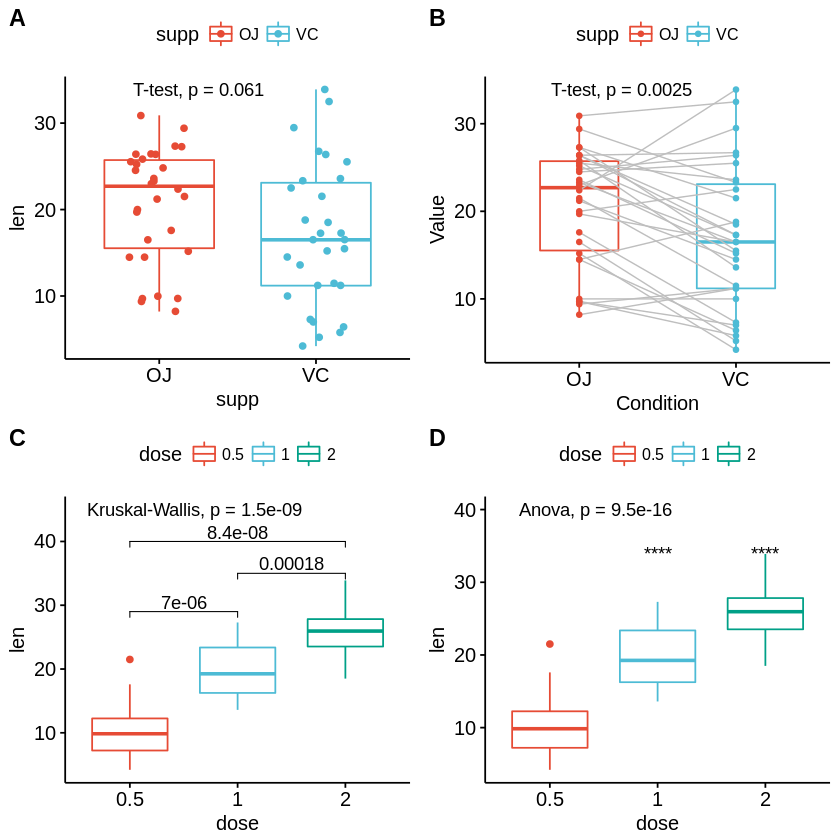

In [20]:
# Two independent groups
p <- ggboxplot(ToothGrowth, x = "supp", y = "len",
    color = "supp", palette = "npg", add = "jitter")

#  Add p-value
p1 <- p + stat_compare_means(method = "t.test")

# Paired samples
p2 <- ggpaired(ToothGrowth, x = "supp", y = "len",
    color = "supp", line.color = "gray", line.size = 0.4,
    palette = "npg")+
    stat_compare_means(paired = TRUE, method = "t.test")

# More than two groups, Pairwise comparisons: Specify the comparisons you want
my_comparisons <- list( c("0.5", "1"), c("1", "2"), c("0.5", "2") )
p3 <- ggboxplot(ToothGrowth, x = "dose", y = "len",
          color = "dose", palette = "npg")+
# Add pairwise comparisons p-value
    stat_compare_means(comparisons = my_comparisons, label.y = c(29, 35, 40))+
    stat_compare_means(label.y = 45)     # Add global Anova p-value

# Multiple pairwise test against a reference group
p4 <- ggboxplot(ToothGrowth, x = "dose", y = "len",
    color = "dose", palette = "npg")+
    stat_compare_means(method = "anova", label.y = 40)+ # Add global p-value
    stat_compare_means(aes(label = ..p.signif..),
                      method = "t.test", ref.group = "0.5")

ggarrange(p1, p2, p3, p4,  ncol = 2, nrow = 2,
          labels = c("A", "B","C","D"))

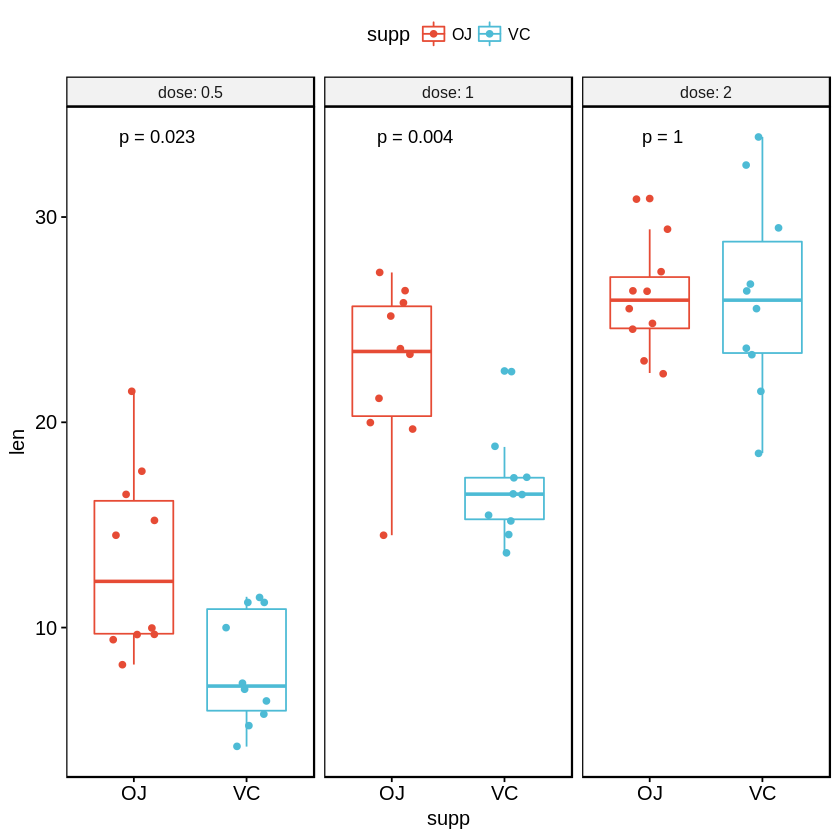

In [21]:
# Multiple grouping variables
p <- ggboxplot(ToothGrowth, x = "supp", y = "len",
              color = "supp", palette = "npg",
              add = "jitter",
              facet.by = "dose", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
p5 <- p + stat_compare_means(aes(label = paste0("p = ", ..p.format..)))
p5

# 5. 간단한 통계 분석
위에서 사용한 `ToothGrowth` 데이터를 사용합니다.

In [22]:
# Load data
data("ToothGrowth")
df <- ToothGrowth

In [23]:
# One-sample test
compare_means(len ~ 1, df, mu = 0)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
len,1,null model,1.664007e-11,1.664007e-11,1.7e-11,****,Wilcoxon


In [24]:
# Two-samples unpaired test
compare_means(len ~ supp, df)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
len,OJ,VC,0.06449067,0.06449067,0.064,ns,Wilcoxon


In [25]:
# Two-samples paired test
compare_means(len ~ supp, df, paired = TRUE)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
len,OJ,VC,0.004312554,0.004312554,0.0043,**,Wilcoxon


In [26]:
# Compare supp levels after grouping the data by "dose"
compare_means(len ~ supp, df, group.by = "dose")

dose,.y.,group1,group2,p,p.adj,p.format,p.signif,method
0.5,len,OJ,VC,0.023186427,0.04637285,0.023,*,Wilcoxon
1.0,len,OJ,VC,0.004030367,0.01209110,0.004,**,Wilcoxon
2.0,len,OJ,VC,1.000000000,1.00000000,1.000,ns,Wilcoxon


In [27]:
# pairwise comparisons
# As dose contains more thant two levels ==>
# pairwise test is automatically performed.
compare_means(len ~ dose, df)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
len,0.5,1,7.020855e-06,1.404171e-05,7.0e-06,****,Wilcoxon
len,0.5,2,8.406447e-08,2.521934e-07,8.4e-08,****,Wilcoxon
len,1,2,1.772382e-04,1.772382e-04,0.00018,***,Wilcoxon


In [28]:
# Comparison against reference group
compare_means(len ~ dose, df, ref.group = "0.5")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
len,0.5,1,7.020855e-06,7.020855e-06,7.0e-06,****,Wilcoxon
len,0.5,2,8.406447e-08,1.681289e-07,8.4e-08,****,Wilcoxon


In [29]:
# Comparison against all
compare_means(len ~ dose, df, ref.group = ".all.")

.y.,group1,group2,p,p.adj,p.format,p.signif,method
len,.all.,0.5,5.078788e-05,0.0001523636,5.1e-05,****,Wilcoxon
len,.all.,1,7.640429e-01,0.7640429386,0.76404,ns,Wilcoxon
len,.all.,2,1.791243e-04,0.0003582486,0.00018,***,Wilcoxon


In [30]:
# Anova test
compare_means(len ~ dose, df, method = "anova")

.y.,p,p.adj,p.format,p.signif,method
len,9.532727e-16,9.532727e-16,9.5e-16,****,Anova


In [31]:
# kruskal.test
compare_means(len ~ dose, df, method = "kruskal.test")

.y.,p,p.adj,p.format,p.signif,method
len,1.475207e-09,1.475207e-09,1.5e-09,****,Kruskal-Wallis


# 6. 더 읽어볼것

- [Easy Way to Mix Multiple Graphs on The Same Page](http://www.sthda.com/english/articles/24-ggpubr-publication-ready-plots/81-ggplot2-easy-way-to-mix-multiple-graphs-on-the-same-page/)
- [Add P-values and Significance Levels to ggplots](http://www.sthda.com/english/articles/24-ggpubr-publication-ready-plots/76-add-p-values-and-significance-levels-to-ggplots/)

# 7. 마치며

`ggpubr`는 정말 딱 필요한 기능을 아주 쉽게 사용할 수 있게 디자인되어 있습니다. 너무 과하지도 않고 대부분의 과학저널에서 사용되는 시각화를 지원하죠. 간단하게 통계분석을 할 수 있다는 점도 마음에 듭니다. 다음에는 데이터 전처리에 사용되는 `dplyr` 패키지에 대해 알아보겠습니다.